# Gradient and edge detection

Gradient of an image can help us to find the color intensity in an image. Edge detection, as the name proposes, help us to find edges in an image, this very useful when working with contours, to count the number of objects in an image.

Covered Skills

- Gradient intensity (Laplacian and Sobel method)
- Edge detection (Canny algorithm).

## Importing libraries

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

## Loading image from disk

In [2]:
img = cv2.imread("images/but_foot.jpg") # Buttom football image

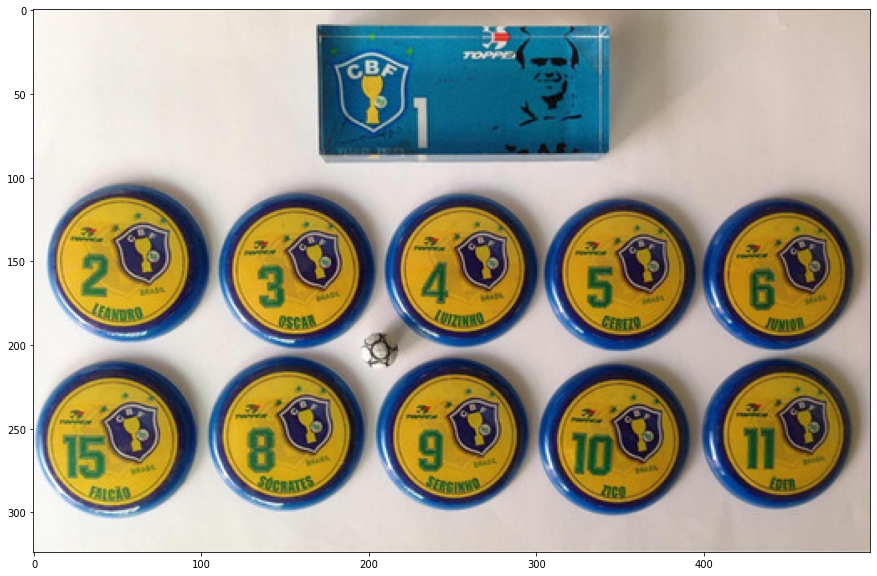

In [3]:
# Visualizing the image
plt.figure(figsize=(15,10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

## Gradient intensity 

**Laplacian method**

Laplacian method considers the second derivation, the Laplacian operator is always used to the edge detection.

The function used to the Laplacian method is **cv2.Laplacian(src, dtype)**. To learn more about this function, click [here](https://docs.opencv.org/3.4/d5/db5/tutorial_laplace_operator.html).

Note, we consider the data type as float pointer to calculate the gradient. We must to convert this data type into int8 and consider the positive values, to maintain the edges in the image.

In [4]:
# We work with gray scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [5]:
# To calculate the gradient
lap = cv2.Laplacian(img, cv2.CV_64F)
lap = np.uint8(np.absolute(lap)) # To convert into int8 and absolute value

**visualizing the results**

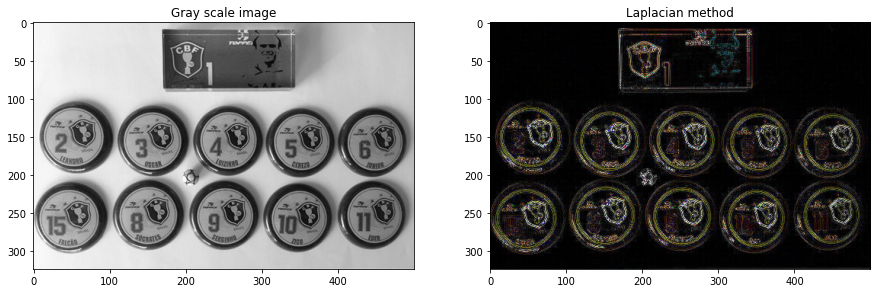

In [6]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.title("Gray scale image")
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
plt.subplot(2,2,2)
plt.title("Laplacian method")
plt.imshow(cv2.cvtColor(lap, cv2.COLOR_BGR2RGB))
plt.show()

Notice how the contours of the buttons are approximately well defined, except in regions in which the intensity are very similar.

**Sobel Method**

Sobel method is similar to the Laplacian, but here, the method consider the first derivation. Also, the method takes account the derivations in the axis $x$ and $y$.

To use the Sobel method, we call the function **cv2.Sobel(src, dtype, x, y)**. The arguments are image source, data type, for this case float pointer, the axis to the derivation.

Here, we calculate the sobel for the both axis and than, we concatenate both axis into one image.

In [7]:
sX = cv2.Sobel(gray, cv2.CV_64F, 1, 0) # Sobel for the axis x
sY = cv2.Sobel(gray, cv2.CV_64F, 0, 1) # Sobel for the axis y

# converting into unit 8
sX = np.uint8(np.absolute(sX))
sY = np.uint8(np.absolute(sY))

# Combined method
sXY = cv2.bitwise_or(sX, sY) # We consider the bitwise operation or

**visualizing the results**

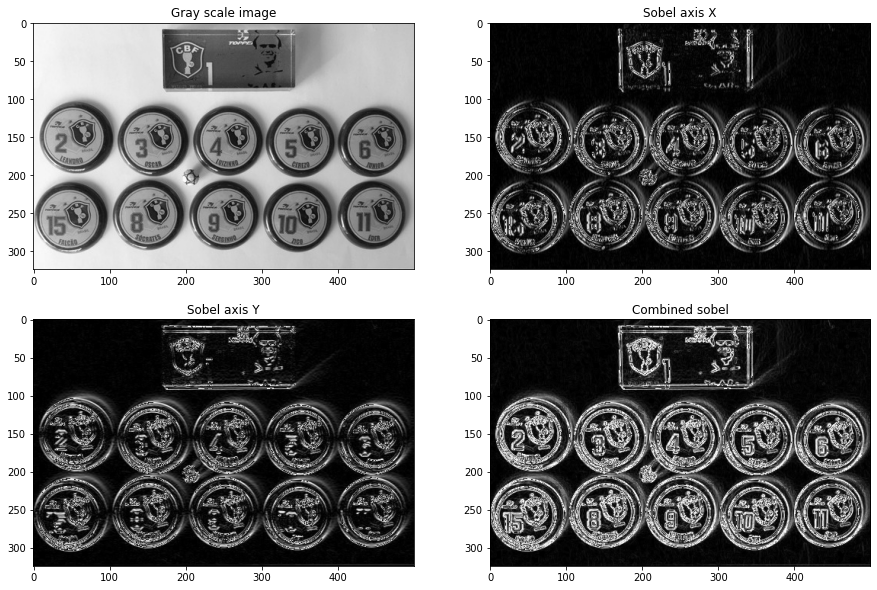

In [8]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.title("Gray scale image")
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
plt.subplot(2,2,2)
plt.title("Sobel axis X")
plt.imshow(cv2.cvtColor(sX, cv2.COLOR_BGR2RGB))
plt.subplot(2,2,3)
plt.title("Sobel axis Y")
plt.imshow(cv2.cvtColor(sY, cv2.COLOR_BGR2RGB))
plt.subplot(2,2,4)
plt.title("Combined sobel")
plt.imshow(cv2.cvtColor(sXY, cv2.COLOR_BGR2RGB))
plt.show()

## Edge detection


**Canny edge detection**

Canny edge detection is an algorithm proposed by Canny. For more details, click [here](https://docs.opencv.org/3.4/da/d5c/tutorial_canny_detector.html).

The function proposed by OpenCV is **cv2.Canny(src, threshold1, threshold2)**. The first argument is the image to be treated, the second and third arguments are the minimal and maximum, this values delimit the edges to be detected.

Note, to proceed with the edge detection, we must have the image in gray scale, to obtain better results, is recommended to blur the image.

In [9]:
# Blurring the image
blur = cv2.GaussianBlur(gray, (5,5), 0) # kernel 5,5

# Calculating the edge detection
canny = cv2.Canny(blur, 30, 150) # threshold1 equal to 30 and threshold2 equal to 150

**visualizing the results**

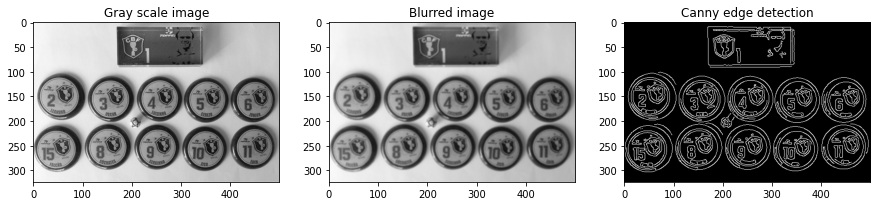

In [10]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.title("Gray scale image")
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
plt.subplot(2,3,2)
plt.title("Blurred image")
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
plt.subplot(2,3,3)
plt.title("Canny edge detection")
plt.imshow(cv2.cvtColor(canny, cv2.COLOR_BGR2RGB))
plt.show()